In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

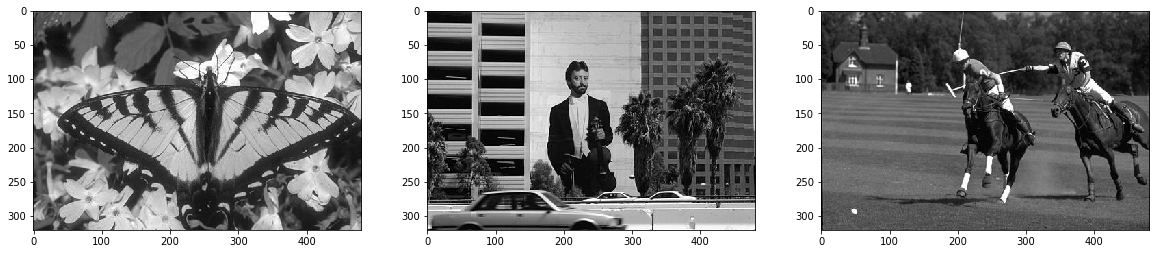

In [2]:
# Image Initialisation
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline
images = []
fig, ax = plt.subplots(1,3,figsize=(20,10))    
for num in range(1,4):
    img_mat = plt.imread(f'HW1_Data/HW1_Q2/Image{num}.jpg')
    img_mat = img_mat/255
    ax[num-1].imshow(img_mat)
    images.append(img_mat)

In [3]:
# Convolution of image and filter
def conv(img, filter):
    conv_img = np.array([[0 for _ in range(img.shape[1])] for _ in range(img.shape[0])])
    for i in range(img.shape[0]-(filter.shape[0]-1)):
        for j in range(img.shape[1]-(filter.shape[1]-1)):
            conv_img[i][j] = np.sum(np.multiply(img[i:i+filter.shape[0],j:j+filter.shape[1]],filter))
    return conv_img

In [4]:
# Gives hessian matrix
def hessian(x):
    sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    I_x = conv(x, sobel_x)
    I_y = conv(x, sobel_y)
    I_x_2 = np.square(I_x) 
    I_y_2 = np.square(I_y)
    I_x_y = np.multiply(I_x,I_y)
    he = np.empty((2,2,I_x.shape[0]-2,I_x.shape[1]-2))
    for i in range(I_x.shape[0]-2):
        for j in range(I_x.shape[1]-2):
            he[0][0][i][j] = np.sum(np.sum(I_x_2[i:i+3,j:j+3]))
            he[1][1][i][j] = np.sum(np.sum(I_y_2[i:i+3,j:j+3]))
            he[0][1][i][j] = np.sum(np.sum(I_x_y[i:i+3,j:j+3]))
            he[1][0][i][j] = np.sum(np.sum(I_x_y[i:i+3,j:j+3]))
    return he

In [5]:
# Shi-Thomasi method for corner detection
def shiThomasi(img, he, threshold):
    result = np.empty(img.shape, dtype=img.dtype)
    square_term = np.sqrt(4*he[0,1]*he[1,0]+np.square(he[0,0]-he[1,1]))
    lambda_min = (he[0,0]+he[1,1]-square_term) / 2
    ans = lambda_min > threshold
    for i in range(lambda_min.shape[0]):
        for j in range(lambda_min.shape[1]):
            if(ans[i][j]):
                result[i][j] = 255
            else:
                result[i][j] = 0
    return result

In [6]:
# Harris Corner Detection technique
def harrisCorner(img, he, threshold, k = 0.03):
    result = np.empty(img.shape, dtype=img.dtype)
    square_term = np.sqrt(4*he[0,1]*he[1,0]+np.square(he[0,0]-he[1,1]))
    lambda_min = (he[0,0]+he[1,1]-square_term) / 2
    lambda_max = (he[0,0]+he[1,1]+square_term) / 2
    f = np.multiply(lambda_min, lambda_max) - k * np.square(lambda_max+ lambda_min)
    ans = f > threshold
    for i in range(lambda_min.shape[0]):
        for j in range(lambda_min.shape[1]):
            if(ans[i][j]):
                result[i][j] = 255
            else:
                result[i][j] = 0
    return result

In [7]:
# for plotting the result
def plot(resultShi,resultHaris):
    fig, ax = plt.subplots(1,2,figsize=(20, 10))
    ax[0].imshow(resultShi)
    ax[0].set_title('Result for Shi-Thomasi Detection')
    ax[1].imshow(resultHaris)
    ax[1].set_title('Result for Haris Corner Detection')

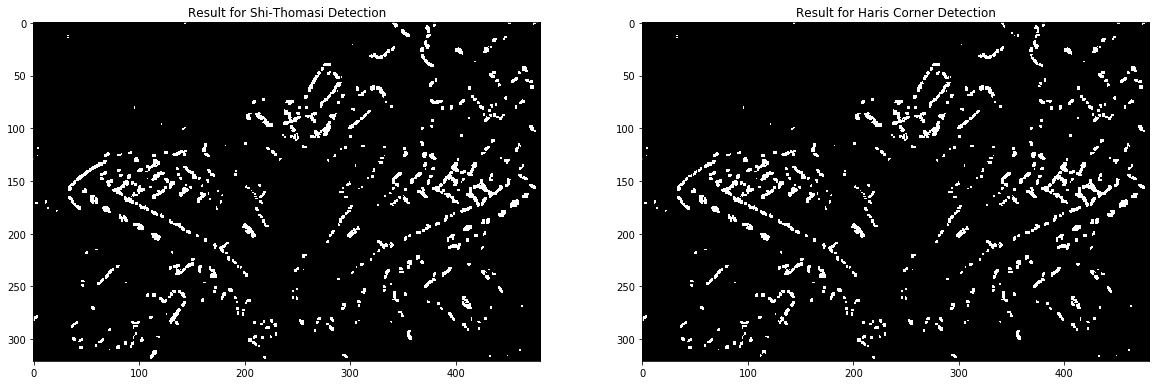

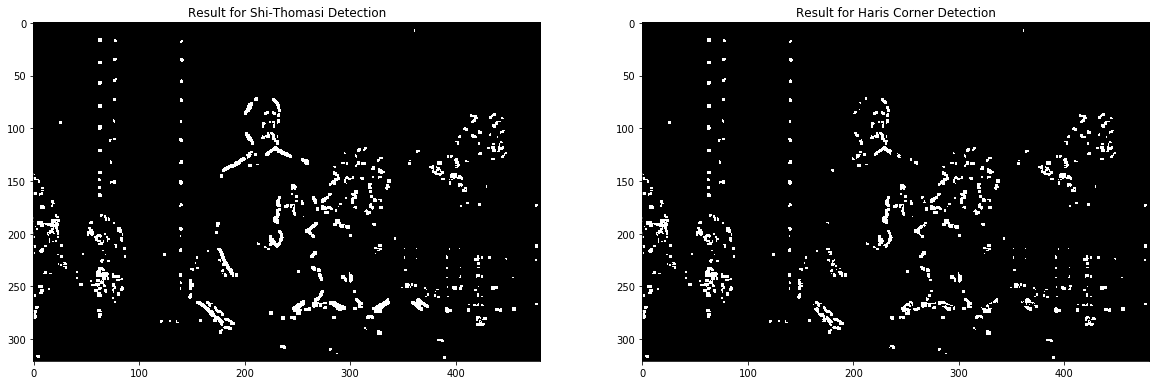

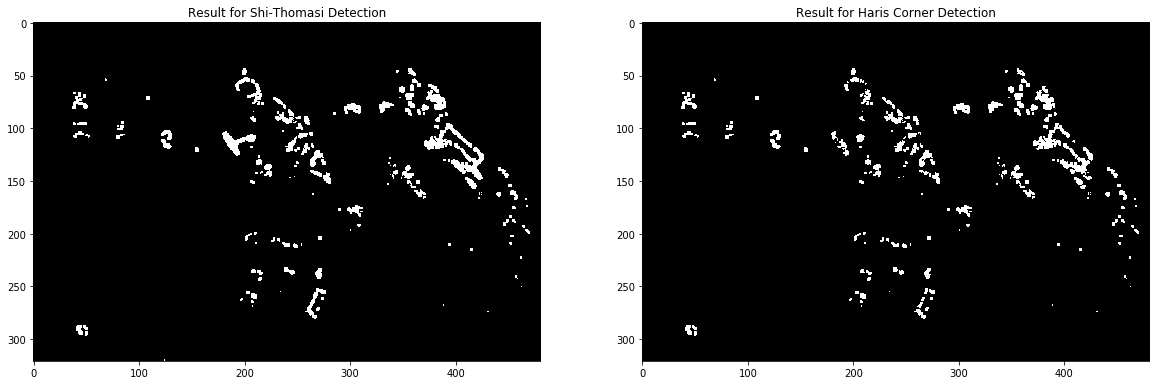

In [11]:
def main():
    for img_mat in images:
        he = hessian(img_mat)
        resultShi = shiThomasi(img_mat ,he, 0.01)
        resultHaris = harrisCorner(img_mat, he, 0.01)
        plot(resultShi, resultHaris)
    
if __name__ == '__main__':
    main()